In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
# display.set_matplotlib_formats('svg')
# plt.matplotlib_inline.backend_inline.set_matplotlib_formats()
%matplotlib inline


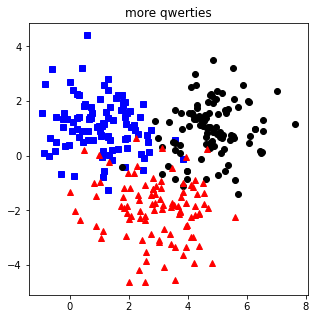

In [2]:
# import and process data
nPerCluster = 100
blur = 1

A = [1, 1]
B = [5, 1]
C = [3, -2]

#generate data
a = [A[0] + np.random.randn(100)*blur, A[1] + np.random.randn(100)*blur]
b = [B[0] + np.random.randn(100)*blur, B[1] + np.random.randn(100)*blur]
c = [C[0] + np.random.randn(100)*blur, C[1] + np.random.randn(100)*blur]

data_np = np.hstack((a, b, c)).T

labels_np = np.vstack((np.zeros((nPerCluster, 1), dtype=np.float16), 
                        np.ones((nPerCluster, 1), dtype=np.float16), 
                        1+np.ones((nPerCluster, 1), dtype=np.float16)))

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())


# # show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0], 1], 'ko')
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0], 1], 'r^')
plt.title("more qwerties")
plt.show()


In [3]:
# model
ANNq = nn.Sequential(
    nn.Linear(2, 4), #input layer, two variables (x,y)
    nn.ReLU(), # activation
    nn.Linear(4, 3), #output
    nn.Softmax(dim=1)
)

# loss funct
lossfunc = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNq.parameters(),lr=0.01)


In [4]:
# test the model
y_hat = ANNq(data)
print(data.shape)
print(y_hat.shape)
print(y_hat)

torch.Size([300, 2])
torch.Size([300, 3])
tensor([[0.1644, 0.2968, 0.5388],
        [0.1758, 0.2310, 0.5932],
        [0.2081, 0.1673, 0.6246],
        [0.2036, 0.2375, 0.5589],
        [0.2479, 0.1733, 0.5788],
        [0.1794, 0.2561, 0.5645],
        [0.2478, 0.2134, 0.5388],
        [0.1572, 0.2630, 0.5798],
        [0.1997, 0.2483, 0.5520],
        [0.1856, 0.2286, 0.5858],
        [0.1318, 0.2993, 0.5690],
        [0.2521, 0.1645, 0.5834],
        [0.1757, 0.2605, 0.5637],
        [0.2013, 0.1768, 0.6219],
        [0.1984, 0.3172, 0.4844],
        [0.1878, 0.2325, 0.5797],
        [0.1915, 0.1787, 0.6298],
        [0.1733, 0.2357, 0.5910],
        [0.1906, 0.2194, 0.5901],
        [0.1890, 0.1685, 0.6425],
        [0.2284, 0.1811, 0.5905],
        [0.2223, 0.2143, 0.5634],
        [0.2108, 0.2277, 0.5615],
        [0.2197, 0.2863, 0.4940],
        [0.1541, 0.2241, 0.6218],
        [0.1559, 0.2766, 0.5675],
        [0.1652, 0.3022, 0.5326],
        [0.1570, 0.3117, 0.5313],
      

In [5]:
# train the model
epochs = 10000
losses = torch.zeros(epochs)
ongoingAcc=[]

for epochi in range(epochs):
    # forward pass
    y_hat = ANNq(data)

    # compute loss
    loss = lossfunc(y_hat, labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy
    matches = torch.argmax(y_hat, axis=1) == labels
    matchesNumeric = matches.float()
    accuractPct = 100*torch.mean(matchesNumeric)
    ongoingAcc.append(accuractPct) 

# final forward pass
predictions = ANNq(data)
predlabels= torch.argmax(predictions, axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())



final accuracy: 91.33333587646484


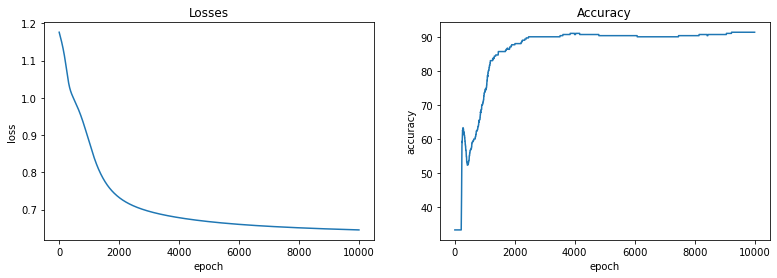

In [6]:
# report accuracy
print(f"final accuracy: {totalacc}")

fig, ax = plt.subplots(1, 2, figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

In [7]:
# confirm model predictions sum to 1
torch.sum(y_hat, axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

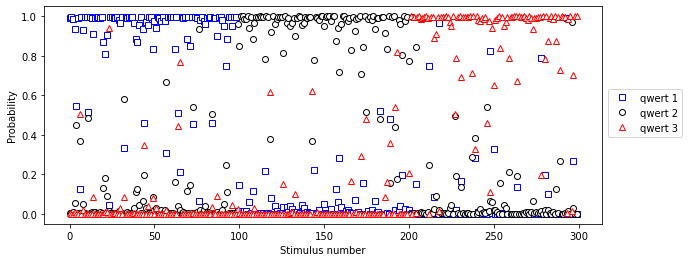

In [10]:
# plot the raw model outputs
fig = plt.figure(figsize=(10, 4))

colorshape = ['bs', 'ko', 'r^']
for i in range(3):
    plt.plot(y_hat[:,i].detach(), colorshape[i], markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwert 1', 'qwert 2', 'qwert 3'], loc=(1.01, .4))
plt.show()